In [2]:
import numpy as np
from sklearn.linear_model import LinearRegression
import matplotlib.pyplot as plt
import pandas as pd
from importlib import reload
import statsmodels.api as sm
import seaborn as sns; sns.set()
import warnings
warnings.filterwarnings('ignore')

In [3]:
df = pd.DataFrame(pd.read_csv("NGAsub_Mega.csv"))

# show the dataframe
df

,NGAsubRSN,DatabaseRegion,NGAsubEQID,NGAsubSSN,Earthquake_Name,YEAR,MODY,HRMN,Earthquake_Magnitude,Hypocenter_Latitude_deg,...,T8.5S,T9S,T9.5S,T10S,T11S,T12S,T13S,T14S,T15S,T20S
0,1000001,Alaska,1000001,1000001,Aleutian_Isl-Alaska,2014,623,2053,7.96,51.692800,...,0.000082,0.000095,0.000103,0.000125,0.000138,0.000109,0.000089,0.000064,0.000053,0.000061
1,1000002,Alaska,1000001,1000002,Aleutian_Isl-Alaska,2014,623,2053,7.96,51.692800,...,0.000415,0.000395,0.000405,0.000390,0.000336,0.000332,0.000263,0.000215,0.000187,0.000119
2,1000003,Alaska,1000001,1000003,Aleutian_Isl-Alaska,2014,623,2053,7.96,51.692800,...,0.000092,0.000083,0.000086,0.000082,0.000091,0.000078,0.000071,0.000066,0.000060,0.000055
3,1000004,Alaska,1000001,1000004,Aleutian_Isl-Alaska,2014,623,2053,7.96,51.692800,...,0.000055,0.000053,0.000051,0.000055,0.000059,0.000058,0.000042,0.000035,0.000038,0.000028
4,1000005,Alaska,1000001,1000005,Aleutian_Isl-Alaska,2014,623,2053,7.96,51.692800,...,0.000129,0.000116,0.000128,0.000122,0.000130,0.000119,0.000096,0.000135,0.000162,0.000060
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
71335,7012502,Taiwan,7000078,7000623,20101121,2010,1121,1232,5.56,23.830333,...,0.000034,0.000030,0.000026,0.000024,0.000020,0.000017,0.000014,0.000013,0.000011,0.000006
71336,7012503,Taiwan,7000078,7000472,20101121,2010,1121,1232,5.56,23.830333,...,0.000053,0.000047,0.000042,0.000038,0.000031,0.000025,0.000021,0.000018,0.000016,0.000009
71337,7012504,Taiwan,7000078,7000699,20101121,2010,1121,1232,5.56,23.830333,...,0.000014,0.000013,0.000012,0.000011,0.000009,0.000008,0.000007,0.000006,0.000005,0.000003
71338,7012505,Taiwan,7000078,7000849,20101121,2010,1121,1232,5.56,23.830333,...,0.000037,0.000033,0.000030,0.000027,0.000022,0.000019,0.000016,0.000013,0.000011,0.000006


In [4]:
#Removing the lack of metadata
metadatamag_rem=df[df.iloc[:,8]==-999].index
metadatahyp_rem = df[df.iloc[:, 11] == -999].index
metadatajb_rem = df[df.iloc[:, 46] == -999].index
metadatavel_rem = df[df.iloc[:, 72] == -999].index

metadat_rem = (metadatamag_rem
               .union(metadatahyp_rem)
               .union(metadatajb_rem)
               .union(metadatavel_rem))

df.drop(index=metadat_rem, inplace=True)

PGA_rem = df[df.iloc[:,114] == -999].index
df.drop(index=PGA_rem, inplace=True)
PGA_g = df[df.iloc[:,113] == -999].index
df.drop(index=PGA_g, inplace=True)


In [5]:
# Removing the rows with blank data
df.drop(index = df[df.iloc[:,8] == -999].index, inplace=True)
df.drop(index = df[df.iloc[:,11] == -999].index, inplace=True)
df.drop(index = df[df.iloc[:,46] == -999].index, inplace=True)
df.drop(index = df[df.iloc[:,72] == -999].index, inplace=True)
df.drop(index = df[df.iloc[:,114] == -999].index, inplace=True)
df.shape

(65562, 227)

In [6]:
# Cleaning data by dropping rows according to guidlines given in the document
df.drop(index = df[df.iloc[:, 61] != 2].index, inplace=True)
df.drop(index = df[df.iloc[:, 113] > 10].index, inplace=True)
df.drop(index = df[df.iloc[:, 39] == 1].index, inplace=True)
df.drop(index = df[df.iloc[:, 47] > 1000].index, inplace=True)
df.drop(index = df[df.iloc[:,70] > 2].index, inplace=True)
df.drop(index = df[(df.iloc[:,17] == 0) & (df.iloc[:, 11] > 40)].index, inplace=True)
df.drop(index = df[(df.iloc[:,17] == 1) & (df.iloc[:,11] > 200)].index, inplace=True)
df.drop(index = df[df.iloc[:, 41] > 4].index, inplace=True)
df.drop(index = df[df.iloc[:, 19] == 1].index, inplace=True)



In [7]:
# Source review flag
df = df[df.iloc[:, 23] != -1]

# Interface and intraslab flags (only 0 and 1)
df.drop(index = df[df.iloc[:, 17] == 2].index, inplace=True)
df.drop(index = df[df.iloc[:, 17] == 3].index, inplace=True)
df.drop(index = df[df.iloc[:, 17] == 4].index, inplace=True)
df.drop(index = df[df.iloc[:, 17] == -444].index, inplace=True)
df.drop(index = df[df.iloc[:, 17] == -666].index, inplace=True)
df.drop(index = df[df.iloc[:, 17] == -777].index, inplace=True)
df.drop(index = df[df.iloc[:, 17] == -888].index, inplace=True)
df.drop(index = df[df.iloc[:, 17] == -999].index, inplace=True)

outliers = df["Rjb_km"][df["Rjb_km"] < 2].index
df.drop(index=outliers, inplace=True)


In [9]:
lr = LinearRegression()
lr.fit(x,y)
y_pred = lr.predict(x)


In [10]:
y_pred

array([ -4.28418954,  -8.70970043, -10.82966036, ...,  -9.29559399,
        -8.99611448,  -9.33327143])

# Linear Fitting and Plotting

Different data are linearly fit using sci-kit learn and are plotted using matplotlib. The labels are helpful to determine the type of plot.


In [13]:
plt=reload(plt)

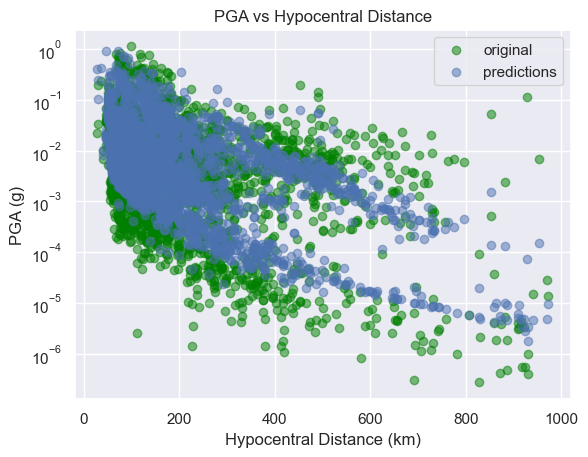

In [22]:
# PGA vs Hypocentral Distance
plt.scatter(hypd, np.exp(y), color='green', alpha=0.5, label="original")
plt.scatter(hypd, np.exp(y_pred), color='b', label="predictions", alpha=0.5)
plt.xlabel('Hypocentral Distance (km)')
plt.ylabel('PGA (g)')
plt.yscale('log')
plt.title("PGA vs Hypocentral Distance")
plt.legend()
plt.show()

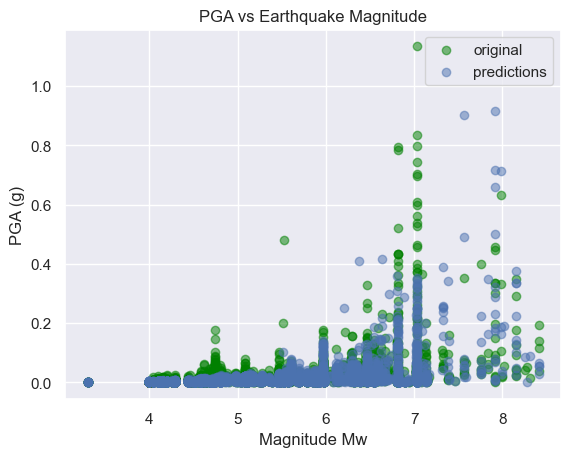

In [24]:
#PGA vs Earthquake Magnitude
plt.scatter(m, np.exp(y), color='green', alpha=0.5, label="original")
plt.scatter(m, np.exp(y_pred), color='b', label="predictions",  alpha=0.5)
plt.xlabel('Magnitude Mw')
plt.ylabel('PGA (g)')
plt.title("PGA vs Earthquake Magnitude")
plt.legend()
plt.show()

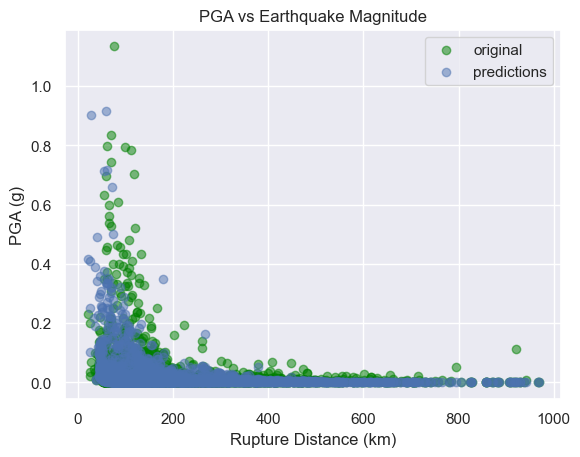

In [27]:
#PGA vs Earthquake Magnitude
plt.scatter(rup, np.exp(y), color='green', alpha=0.5, label="original")
plt.scatter(rup, np.exp(y_pred), color='b', label="predictions",  alpha=0.5)
plt.xlabel('Rupture Distance (km)')
plt.ylabel('PGA (g)')
plt.title("PGA vs Earthquake Magnitude")
plt.legend()
plt.show()

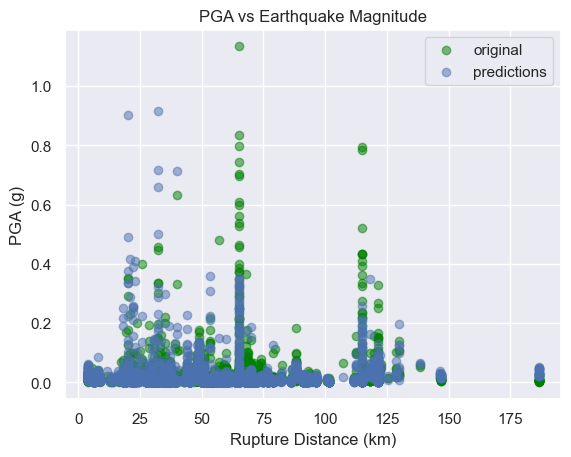

In [28]:
#PGA vs Hypocentral Depth
plt.scatter(fdepth, np.exp(y), color='green', alpha=0.5, label="original")
plt.scatter(fdepth, np.exp(y_pred), color='b', label="predictions",  alpha=0.5)
plt.xlabel('Rupture Distance (km)')
plt.ylabel('PGA (g)')
plt.title("PGA vs Earthquake Magnitude")
plt.legend()
plt.show()

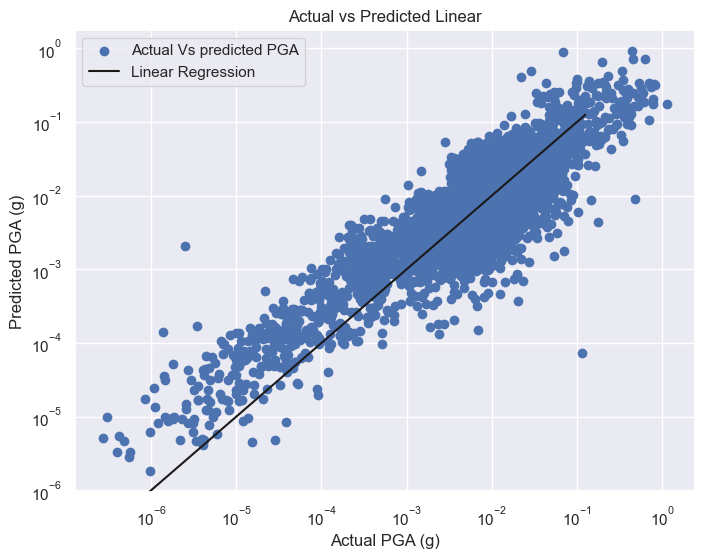

In [26]:
#Predicted vs Actual PGA plot
plt.figure(figsize=(8, 6))
plt.scatter(np.exp(y), np.exp(y_pred),label='Actual Vs predicted PGA')
plt.plot([y.min(), y.max()], [y.min(), y.max()], color='k', label='Linear Regression')  # Plotting the diagonal line
plt.xscale('log')
plt.yscale('log')
plt.xlabel('Actual PGA (g)')
plt.ylabel('Predicted PGA (g)')
plt.title('Actual vs Predicted Linear')
plt.legend()
plt.show()

## Mixed Linear Model

In [32]:
# Using the mixed-effects model
mixed_lm = sm.MixedLM(y, x, fmech)

# Fit the model
mixed_lm_fit = mixed_lm.fit()

# Print the summary
print(mixed_lm_fit.summary())

         Mixed Linear Model Regression Results
Model:            MixedLM Dependent Variable: PGA_g     
No. Observations: 5079    Method:             REML      
No. Groups:       5       Scale:              0.8512    
Min. group size:  280     Log-Likelihood:     -6840.2132
Max. group size:  1625    Converged:          Yes       
Mean group size:  1015.8                                
--------------------------------------------------------
             Coef.  Std.Err.    z    P>|z| [0.025 0.975]
--------------------------------------------------------
x1           -0.008    0.002  -4.973 0.000 -0.011 -0.005
x2            1.499    0.019  77.831 0.000  1.461  1.537
x3            0.006    0.002   3.674 0.000  0.003  0.009
x4           -2.128    0.066 -32.162 0.000 -2.258 -1.998
x5           -0.414    0.030 -13.894 0.000 -0.472 -0.355
x6            0.019    0.001  37.377 0.000  0.018  0.020
x7           -0.485    0.204  -2.384 0.017 -0.884 -0.086
Group Var     0.869    0.769             

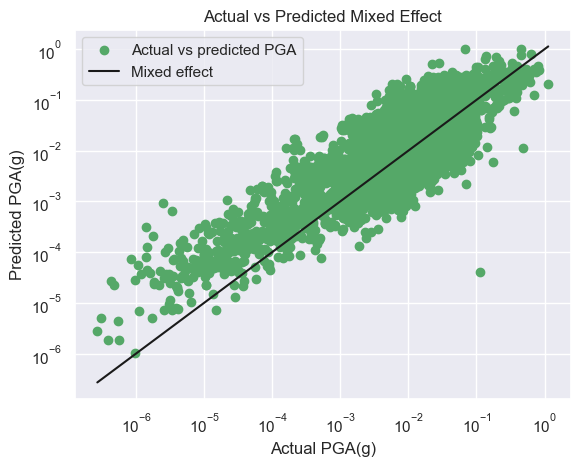

In [34]:
# Get the predicted values
predicted_values = mixed_lm_fit.predict()

# Actual vs predicted
plt.scatter(np.exp(y), np.exp(predicted_values),label='Actual vs predicted PGA', c="g")
plt.plot([np.exp(y).min(), np.exp(y).max()], [np.exp(y).min(), np.exp(y).max()],c='k', label="Mixed effect")  # Plotting the diagonal line
plt.xscale('log')
plt.yscale('log')
plt.xlabel('Actual PGA(g)')
plt.ylabel('Predicted PGA(g)')
plt.title('Actual vs Predicted Mixed Effect')
plt.legend()
plt.show()


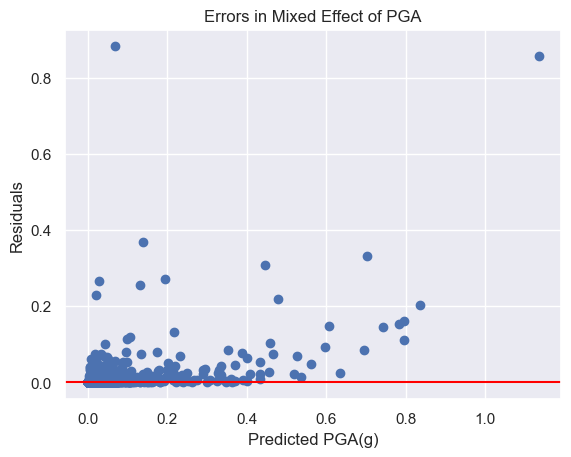

In [35]:
# Residuals
resd = (np.exp(y)- np.exp(predicted_values))**2

plt.scatter(np.exp(y), resd)

plt.xlabel('Predicted PGA(g)')
plt.ylabel('Residuals')
plt.title('Errors in Mixed Effect of PGA')
plt.grid(True)
plt.axhline(y=0, color='red')  # Add a horizontal line at y=0
plt.show()

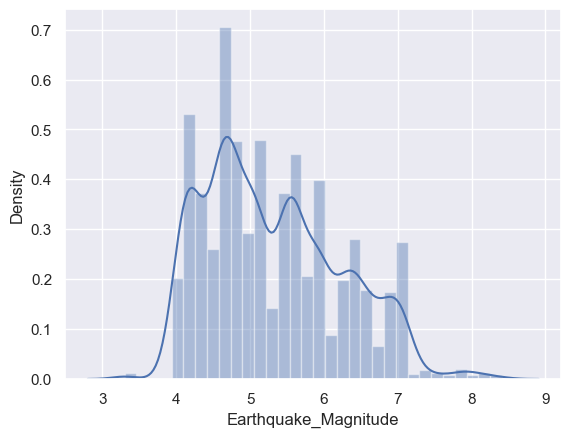

In [36]:
sns.distplot(df.Earthquake_Magnitude)
plt.show()

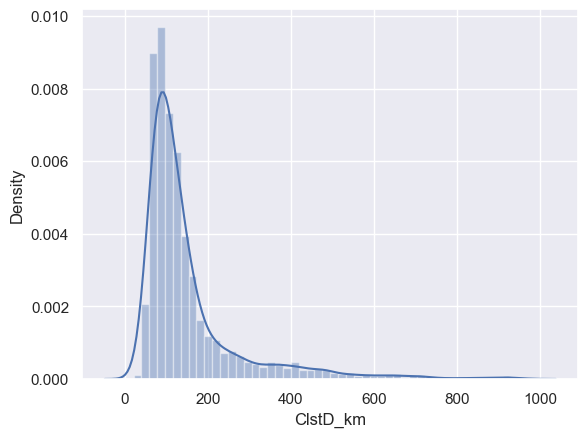

In [47]:
sns.distplot(df.ClstD_km)
plt.show()

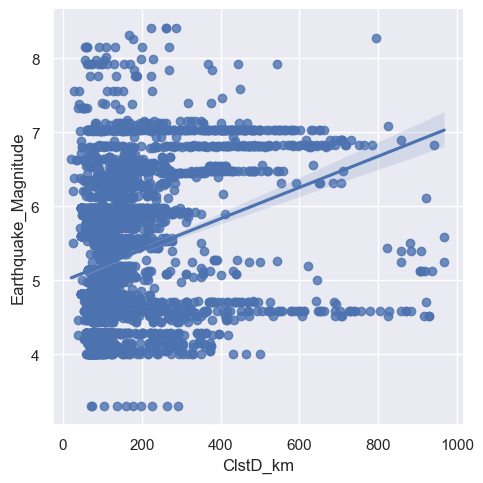

In [42]:
sns.lmplot(x = "ClstD_km", y = "Earthquake_Magnitude", data = df)